<a href="https://colab.research.google.com/github/danm91/le_kingmakers/blob/RNNs/danm91_RNN_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Le KingMakers/kaggle.csv', names = ['sentiment','2','3','4','5','tweet'], encoding='latin-1')

In [ ]:
df = df.sample(frac=0.05, random_state=0).copy()

In [ ]:
df = df[['tweet','sentiment']]
df.head()

,tweet,sentiment
557138,wants to compete! i want hard competition! i w...,0
349381,It seems we are stuck on the ground in Amarill...,0
182051,where the f are my pinking shears? rarararrrar...,0
571236,0ff t0 tHE MEEtiN.. i HAtE WhEN PPl V0lUNtEER...,0
1339637,@ reply me pls,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'],df['sentiment'],test_size=0.2, stratify=df['sentiment'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,stratify=y_train)

In [ ]:
import re
import string
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def process_tweets(tweet):
  urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
  userPattern = '@[^\s]+'
  some = 'amp,today,tomorrow,going,girl'
  stopword = stopwords.words('english')
  stopword.remove('not')
  stopword.remove('no')
  # Lower Casing
  tweet = re.sub(r"he's", "he is", tweet)
  tweet = re.sub(r"there's", "there is", tweet)
  tweet = re.sub(r"We're", "We are", tweet)
  tweet = re.sub(r"That's", "That is", tweet)
  tweet = re.sub(r"won't", "will not", tweet)
  tweet = re.sub(r"they're", "they are", tweet)
  tweet = re.sub(r"Can't", "Cannot", tweet)
  tweet = re.sub(r"wasn't", "was not", tweet)
  tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
  tweet = re.sub(r"aren't", "are not", tweet)
  tweet = re.sub(r"isn't", "is not", tweet)
  tweet = re.sub(r"What's", "What is", tweet)
  tweet = re.sub(r"haven't", "have not", tweet)
  tweet = re.sub(r"hasn't", "has not", tweet)
  tweet = re.sub(r"There's", "There is", tweet)
  tweet = re.sub(r"He's", "He is", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"You're", "You are", tweet)
  tweet = re.sub(r"I'M", "I am", tweet)
  tweet = re.sub(r"shouldn't", "should not", tweet)
  tweet = re.sub(r"wouldn't", "would not", tweet)
  tweet = re.sub(r"i'm", "I am", tweet)
  tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
  tweet = re.sub(r"I'm", "I am", tweet)
  tweet = re.sub(r"Isn't", "is not", tweet)
  tweet = re.sub(r"Here's", "Here is", tweet)
  tweet = re.sub(r"you've", "you have", tweet)
  tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
  tweet = re.sub(r"we're", "we are", tweet)
  tweet = re.sub(r"what's", "what is", tweet)
  tweet = re.sub(r"couldn't", "could not", tweet)
  tweet = re.sub(r"we've", "we have", tweet)
  tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
  tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
  tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
  tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
  tweet = re.sub(r"who's", "who is", tweet)
  tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
  tweet = re.sub(r"y'all", "you all", tweet)
  tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
  tweet = re.sub(r"would've", "would have", tweet)
  tweet = re.sub(r"it'll", "it will", tweet)
  tweet = re.sub(r"we'll", "we will", tweet)
  tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
  tweet = re.sub(r"We've", "We have", tweet)
  tweet = re.sub(r"he'll", "he will", tweet)
  tweet = re.sub(r"Y'all", "You all", tweet)
  tweet = re.sub(r"Weren't", "Were not", tweet)
  tweet = re.sub(r"Didn't", "Did not", tweet)
  tweet = re.sub(r"they'll", "they will", tweet)
  tweet = re.sub(r"they'd", "they would", tweet)
  tweet = re.sub(r"DON'T", "DO NOT", tweet)
  tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
  tweet = re.sub(r"they've", "they have", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"should've", "should have", tweet)
  tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
  tweet = re.sub(r"where's", "where is", tweet)
  tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
  tweet = re.sub(r"we'd", "we would", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"weren't", "were not", tweet)
  tweet = re.sub(r"They're", "They are", tweet)
  tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
  tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
  tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
  tweet = re.sub(r"let's", "let us", tweet)
  tweet = re.sub(r"it's", "it is", tweet)
  tweet = re.sub(r"can't", "cannot", tweet)
  tweet = re.sub(r"don't", "do not", tweet)
  tweet = re.sub(r"you're", "you are", tweet)
  tweet = re.sub(r"i've", "I have", tweet)
  tweet = re.sub(r"that's", "that is", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"doesn't", "does not", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"didn't", "did not", tweet)
  tweet = re.sub(r"ain't", "am not", tweet)
  tweet = re.sub(r"you'll", "you will", tweet)
  tweet = re.sub(r"I've", "I have", tweet)
  tweet = re.sub(r"Don't", "do not", tweet)
  tweet = re.sub(r"I'll", "I will", tweet)
  tweet = re.sub(r"I'd", "I would", tweet)
  tweet = re.sub(r"Let's", "Let us", tweet)
  tweet = re.sub(r"you'd", "You would", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"Ain't", "am not", tweet)
  tweet = re.sub(r"Haven't", "Have not", tweet)
  tweet = re.sub(r"Could've", "Could have", tweet)
  tweet = re.sub(r"youve", "you have", tweet)  
  tweet = re.sub(r"donå«t", "do not", tweet)  
  
  tweet = re.sub(r"some1", "someone", tweet)
  tweet = re.sub(r"yrs", "years", tweet)
  tweet = re.sub(r"hrs", "hours", tweet)
  tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
  tweet = re.sub(r"2day", "today", tweet)
  tweet = re.sub(r"4got|4gotten", "forget", tweet)
  tweet = re.sub(r"b-day|bday", "b-day", tweet)
  tweet = re.sub(r"mother's", "mother", tweet)
  tweet = re.sub(r"mom's", "mom", tweet)
  tweet = re.sub(r"dad's", "dad", tweet)
  tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
  tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
  tweet = re.sub(r"thanx|thnx", "thanks", tweet)
  tweet = re.sub(r"goood", "good", tweet)
  tweet = re.sub(r"some1", "someone", tweet)
  tweet = re.sub(r"some1", "someone", tweet)
  tweet = tweet.lower()
#     tweet=tweet[1:]
  # Removing all URls 
  tweet = re.sub(urlPattern,'',tweet)
  # Removing all @username.
  tweet = re.sub(userPattern,'', tweet) 
  #remove some words
  tweet= re.sub(some,'',tweet)
  #Remove punctuations
  tweet = tweet.translate(str.maketrans("","",string.punctuation))
  #tokenizing words
  tokens = word_tokenize(tweet)
  #tokens = [w for w in tokens if len(w)>2]
  #Removing Stop Words
  final_tokens = [w for w in tokens if w not in stopword]
  #reducing a word to its word stem 
  wordLemm = WordNetLemmatizer()
  finalwords=[]
  for w in final_tokens:
    if len(w)>1:
      word = wordLemm.lemmatize(w)
      finalwords.append(word)
  return ' '.join(finalwords) 

In [ ]:
X_samp = X_train.sample(10000, random_state=0)
y_samp = y_train.sample(10000, random_state=0)

In [ ]:
y_samp = y_samp.map(lambda x: 1 if x==4 else 0)

In [ ]:
y_val = y_val.map(lambda x: 1 if x==4 else 0)

In [ ]:
X_samp = X_samp.apply(process_tweets)
X_val = X_val.apply(process_tweets)

Starting on the RNN....

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_samp)
    
X_samp_token = tokenizer.texts_to_sequences(X_samp)
X_val_token = tokenizer.texts_to_sequences(X_val)

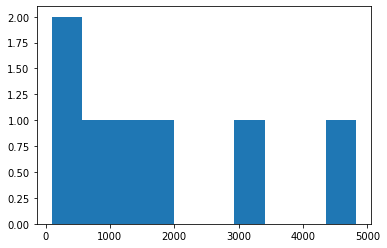

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X_samp_token[0])
plt.show()

(array([ 377.,  719.,  950.,  947., 1008.,  948.,  817.,  825.,  654.,
         642., 1021.,  382.,  284.,  202.,  115.,   60.,   30.,    7.,
           5.,    7.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ,
        12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. ]),
 <a list of 20 Patch objects>)

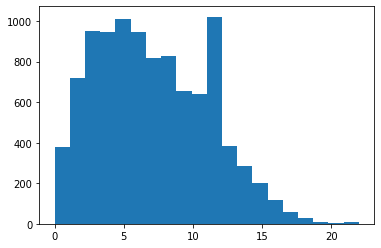

In [ ]:
plt.hist([len(X_samp_token[k]) for k in range(len(X_samp_token))], bins=20)


In [ ]:
import numpy as np

In [ ]:
np.max([len(X_samp_token[k]) for k in range(len(X_samp_token))])

24

In [ ]:
vocab_size = len(tokenizer.word_index)
vocab_size

13919

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
lengths = []
for i in X_samp_token:
  lengths.append(len(i))

max(lengths)

22

In [ ]:
X_samp_pad = pad_sequences(X_samp_token, dtype='float32', padding='post')
X_val_pad = pad_sequences(X_val_token, dtype='float32', padding='post')

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [ ]:
embedding_size=100
reg_l2 = regularizers.L2(0.01)
reg_l1 = regularizers.L1(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)
es = EarlyStopping(monitor='accuracy', patience=5)

In [ ]:
def init_model():

  model = Sequential()
  model.add(layers.Embedding(
      input_dim=vocab_size+1, 
      output_dim=embedding_size,
      mask_zero=True, # Included masking layer :)
  ))
  model.add(layers.LSTM(64, activation='tanh',return_sequences=True))
  # model.add(layers.Dropout(rate=0.2))
  model.add(layers.LSTM(32, activation='tanh'))
  
  model.add(layers.Dense(15, activation='relu', activity_regularizer=reg_l1))
  model.add(layers.Dropout(rate=0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  
  #compile
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
  return model


In [ ]:
model = init_model()

In [ ]:
model.fit(X_samp_pad, y_samp,
          validation_data=(X_val_pad,y_val),
                    epochs=20, 
                    batch_size=64, 
                    verbose=1,
                    callbacks=[es])

Epoch 1/20
157/157 [==============================] - 15s 56ms/step - loss: 0.6309 - accuracy: 0.6724 - val_loss: 0.5680 - val_accuracy: 0.7399
Epoch 2/20
157/157 [==============================] - 7s 44ms/step - loss: 0.4825 - accuracy: 0.8047 - val_loss: 0.5555 - val_accuracy: 0.7452
Epoch 3/20
157/157 [==============================] - 7s 45ms/step - loss: 0.4065 - accuracy: 0.8466 - val_loss: 0.5792 - val_accuracy: 0.7409
Epoch 4/20
157/157 [==============================] - 7s 45ms/step - loss: 0.3425 - accuracy: 0.8780 - val_loss: 0.6158 - val_accuracy: 0.7323
Epoch 5/20
157/157 [==============================] - 7s 46ms/step - loss: 0.2966 - accuracy: 0.9050 - val_loss: 0.6738 - val_accuracy: 0.7241
Epoch 6/20
157/157 [==============================] - 7s 46ms/step - loss: 0.2530 - accuracy: 0.9232 - val_loss: 0.7203 - val_accuracy: 0.7182
Epoch 7/20
157/157 [==============================] - 7s 45ms/step - loss: 0.2233 - accuracy: 0.9362 - val_loss: 0.7548 - val_accuracy: 0.716

KeyboardInterrupt: ignored